### Shows dataset kecamatan.csv

In [31]:
import pandas as pd

data_kecamatan = pd.read_csv('Kecamatan.csv')
data_kecamatan.head()

,Wilayah,Komposit,NCPR,Kemiskinan (%),Pengeluaran_Pangan(%),Tanpa_Listrik(%),Tanpa Air Bersih (%),Lama Sekolah Perempuan,Rasio Tenaga Kesehatan,Angka Kesakitan,Stunting (%),IKP,IKP Ranking
0,aceh selatan - bakongan,2,3.85,13.18,7.16,0.0,68.00,7.47,100.00,8.70,19.17,50.13,254
1,aceh selatan - kluet utara,6,0.00,13.18,13.55,0.0,34.24,8.83,40.02,18.16,4.00,80.52,47
2,aceh selatan - kluet selatan,6,0.00,13.18,7.13,0.0,53.56,8.65,100.00,7.98,1.84,78.96,68
3,aceh selatan - labuhan haji,6,0.01,13.18,6.32,0.0,10.28,8.82,57.11,11.22,1.61,87.82,8
4,aceh selatan - meukek,6,0.01,13.18,22.07,0.0,38.40,9.16,100.00,9.23,2.08,79.32,61


### Move Komposit label

In [32]:
komposit_class = data_kecamatan.pop('Komposit')
data_kecamatan['Komposit'] = komposit_class

data_kecamatan.head()

,Wilayah,NCPR,Kemiskinan (%),Pengeluaran_Pangan(%),Tanpa_Listrik(%),Tanpa Air Bersih (%),Lama Sekolah Perempuan,Rasio Tenaga Kesehatan,Angka Kesakitan,Stunting (%),IKP,IKP Ranking,Komposit
0,aceh selatan - bakongan,3.85,13.18,7.16,0.0,68.00,7.47,100.00,8.70,19.17,50.13,254,2
1,aceh selatan - kluet utara,0.00,13.18,13.55,0.0,34.24,8.83,40.02,18.16,4.00,80.52,47,6
2,aceh selatan - kluet selatan,0.00,13.18,7.13,0.0,53.56,8.65,100.00,7.98,1.84,78.96,68,6
3,aceh selatan - labuhan haji,0.01,13.18,6.32,0.0,10.28,8.82,57.11,11.22,1.61,87.82,8,6
4,aceh selatan - meukek,0.01,13.18,22.07,0.0,38.40,9.16,100.00,9.23,2.08,79.32,61,6


In [33]:
data_kecamatan.isnull().sum()

Wilayah                   0
NCPR                      0
Kemiskinan (%)            0
Pengeluaran_Pangan(%)     0
Tanpa_Listrik(%)          0
Tanpa Air Bersih (%)      0
Lama Sekolah Perempuan    0
Rasio Tenaga Kesehatan    0
Angka Kesakitan           0
Stunting (%)              0
IKP                       0
IKP Ranking               0
Komposit                  0
dtype: int64

### Start classification


In [34]:
import pandas as pd  # Untuk manipulasi data menggunakan dataframe
import numpy as np  # Untuk operasi numerik
from sklearn.model_selection import train_test_split  # Membagi data menjadi training dan testing
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Normalisasi data dan encoding label
from sklearn.neighbors import KNeighborsClassifier  # Klasifikasi K-Nearest Neighbors (KNN)
from sklearn.metrics import classification_report, confusion_matrix  # Metrik evaluasi model
import matplotlib.pyplot as plt  # Untuk visualisasi grafik
import seaborn as sns  # Untuk heatmap confusion matrix


In [35]:
def prepare_kecamatan_data(filepath='Kecamatan.csv'):
    """
    Prepare data kecamatan untuk klasifikasi
    """
    # Baca dataset
    df = pd.read_csv(filepath)  # Membaca data dari file CSV
   
    # Pilih fitur yang akan digunakan (9 indikator)
    features = ['NCPR', 'Kemiskinan (%)', 'Pengeluaran_Pangan(%)', 'Tanpa_Listrik(%)',
                'Tanpa Air Bersih (%)', 'Lama Sekolah Perempuan', 'Rasio Tenaga Kesehatan',
                'Angka Kesakitan', 'Stunting (%)']
   
    X = df[features]  # Data fitur
    y = df['Komposit']  # Label target
   
    # Encode target variable (4,5,6 -> 0,1,2)
    le = LabelEncoder()  # Label encoding
    y = le.fit_transform(y)  # Mengubah label menjadi bentuk numerik
   
    return X, y, le  # Mengembalikan data fitur (X), label (y), dan encoder label


In [36]:
def train_and_evaluate_knn(X_train, X_test, y_train, y_test, n_neighbors=5):
    """
    Train dan evaluasi model KNN untuk data kecamatan
    """
    # Standardisasi fitur
    scaler = StandardScaler()  # Normalisasi data fitur
    X_train_scaled = scaler.fit_transform(X_train)  # Fit dan transform data training
    X_test_scaled = scaler.transform(X_test)  # Transform data testing
   
    # Train model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)  # Membuat model KNN
    knn.fit(X_train_scaled, y_train)  # Melatih model dengan data training
   
    # Prediksi
    y_pred = knn.predict(X_test_scaled)  # Melakukan prediksi pada data testing
   
    # Dapatkan label unik
    unique_labels = np.unique(y_test)  # Mendapatkan label unik dari data testing
    target_names = [f'Kelas {label}' for label in unique_labels]  # Nama target untuk report
   
    # Evaluasi
    print("\nHasil Klasifikasi Data Kecamatan:")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names, zero_division=1))
   
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)  # Membuat confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  # Visualisasi confusion matrix
                xticklabels=target_names, yticklabels=target_names)
    plt.title('Confusion Matrix - Data Kecamatan')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
   
    return knn, scaler  # Mengembalikan model KNN dan scaler


In [37]:
def optimize_k(X_train, X_test, y_train, y_test, k_range=range(1, 31)):
    """
    Cari nilai k optimal untuk data kecamatan
    """
    # Standardisasi fitur
    scaler = StandardScaler()  # Normalisasi data
    X_train_scaled = scaler.fit_transform(X_train)  # Fit dan transform data training
    X_test_scaled = scaler.transform(X_test)  # Transform data testing
   
    accuracies = []  # Daftar untuk menyimpan akurasi
   
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)  # Model KNN untuk setiap nilai k
        knn.fit(X_train_scaled, y_train)  # Melatih model
        accuracy = knn.score(X_test_scaled, y_test)  # Menghitung akurasi
        accuracies.append(accuracy)  # Menyimpan akurasi
   
    # Visualisasi akurasi vs nilai k
    plt.figure(figsize=(10,6))
    plt.plot(k_range, accuracies)
    plt.xlabel('Nilai K')
    plt.ylabel('Akurasi')
    plt.title('KNN Kecamatan: Akurasi vs Nilai K')
    plt.grid(True)
    plt.show()
   
    # Mendapatkan nilai k terbaik
    best_k = k_range[np.argmax(accuracies)]  # Nilai k dengan akurasi tertinggi
    print(f"\nNilai k terbaik untuk data kecamatan: {best_k} dengan akurasi: {max(accuracies):.4f}")
   
    return best_k  # Mengembalikan nilai k terbaik


In [38]:
def main():
    print("Processing data kecamatan...")
    X_kec, y_kec, le_kec = prepare_kecamatan_data()  # Persiapan data
   
    # Membagi data menjadi training dan testing
    X_train_kec, X_test_kec, y_train_kec, y_test_kec = train_test_split(
        X_kec, y_kec, test_size=0.2, random_state=42
    )
   
    # Cari nilai k optimal
    best_k_kec = optimize_k(X_train_kec, X_test_kec, y_train_kec, y_test_kec)
   
    # Train model final dengan nilai k terbaik
    print("\nTraining model kecamatan final...")
    knn_kec, scaler_kec = train_and_evaluate_knn(
        X_train_kec, X_test_kec, y_train_kec, y_test_kec, n_neighbors=best_k_kec
    )


Processing data kecamatan...


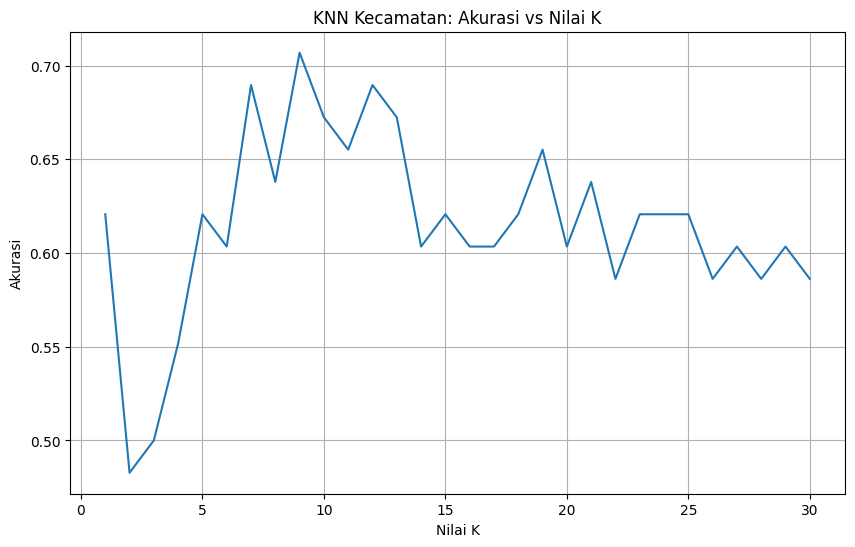


Nilai k terbaik untuk data kecamatan: 9 dengan akurasi: 0.7069

Training model kecamatan final...

Hasil Klasifikasi Data Kecamatan:

Classification Report:
              precision    recall  f1-score   support

     Kelas 0       0.33      0.50      0.40         2
     Kelas 1       1.00      0.00      0.00         1
     Kelas 2       1.00      0.50      0.67         2
     Kelas 3       0.50      0.58      0.54        12
     Kelas 4       0.78      0.75      0.76        28
     Kelas 5       0.85      0.85      0.85        13

    accuracy                           0.71        58
   macro avg       0.74      0.53      0.54        58
weighted avg       0.73      0.71      0.71        58



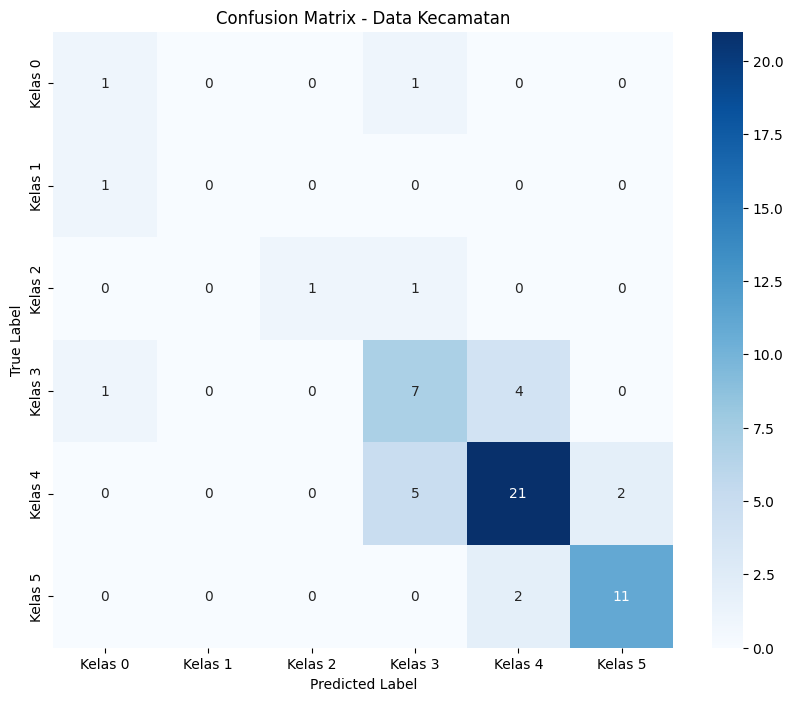

In [39]:
if __name__ == "__main__":
    main()


### Shows dataset nasional.csv


In [40]:
import pandas as pd

data_kabupaten = pd.read_csv('kabupaten.csv')
data_kabupaten.head()


,Wilayah,Komposit,NCPR,Kemiskinan (%),Pengeluaran_Pangan(%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),IKP,IKP Ranking
0,aceh - aceh selatan,5,0.78,13.18,52.86,0.00,46.34,8.75,2.43,64.40,27.3,71.02,274
1,aceh - aceh tenggara,6,0.28,13.41,38.71,0.00,41.55,9.62,2.87,68.22,34.1,77.39,188
2,aceh - aceh timur,6,0.52,14.45,32.76,0.00,33.96,8.66,2.01,68.74,38.2,76.55,200
3,aceh - aceh tengah,4,2.57,15.26,28.92,0.24,42.25,10.10,2.45,68.86,34.3,63.93,326
4,aceh - aceh barat,6,0.56,18.81,38.49,0.00,21.76,10.22,1.82,67.99,27.4,77.56,184


### move komposit label

In [41]:
komposit_class = data_kabupaten.pop('Komposit')
data_kabupaten['Komposit'] = komposit_class

data_kabupaten.head()

,Wilayah,NCPR,Kemiskinan (%),Pengeluaran_Pangan(%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),IKP,IKP Ranking,Komposit
0,aceh - aceh selatan,0.78,13.18,52.86,0.00,46.34,8.75,2.43,64.40,27.3,71.02,274,5
1,aceh - aceh tenggara,0.28,13.41,38.71,0.00,41.55,9.62,2.87,68.22,34.1,77.39,188,6
2,aceh - aceh timur,0.52,14.45,32.76,0.00,33.96,8.66,2.01,68.74,38.2,76.55,200,6
3,aceh - aceh tengah,2.57,15.26,28.92,0.24,42.25,10.10,2.45,68.86,34.3,63.93,326,4
4,aceh - aceh barat,0.56,18.81,38.49,0.00,21.76,10.22,1.82,67.99,27.4,77.56,184,6


In [42]:
data_kabupaten.isnull().sum()

Wilayah                           0
NCPR                              0
Kemiskinan (%)                    0
Pengeluaran_Pangan(%)             0
Tanpa Listrik (%)                 0
Tanpa Air Bersih (%)              0
Lama Sekolah Perempuan (tahun)    0
Rasio Tenaga Kesehatan            0
Angka Harapan Hidup (tahun)       0
Stunting (%)                      0
IKP                               0
IKP Ranking                       0
Komposit                          0
dtype: int64

### start classification

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
def prepare_kabupaten_data(filepath='Kabupaten.csv'):
    """
    Prepare data kabupaten untuk klasifikasi
    """
    df = pd.read_csv(filepath)
    features = ['NCPR', 'Kemiskinan (%)', 'Pengeluaran_Pangan(%)', 'Tanpa Listrik (%)',
                'Tanpa Air Bersih (%)', 'Lama Sekolah Perempuan (tahun)', 'Rasio Tenaga Kesehatan',
                'Angka Harapan Hidup (tahun)', 'Stunting (%)']
    X = df[features]
    y = df['Komposit']
   
    le = LabelEncoder()
    y = le.fit_transform(y)
   
    return X, y, le


In [45]:
def train_and_evaluate_knn(X_train, X_test, y_train, y_test, n_neighbors=5):
    """
    Train dan evaluasi model KNN untuk data kabupaten
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)

    unique_labels = np.unique(y_test)
    target_names = [f'Kelas {label}' for label in unique_labels]

    print("\nHasil Klasifikasi Data kabupaten:")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names,
                yticklabels=target_names)
    plt.title('Confusion Matrix - Data kabupaten')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
   
    return knn, scaler


In [46]:
def optimize_k(X_train, X_test, y_train, y_test, k_range=range(1, 31)):
    """
    Cari nilai k optimal untuk data kabupaten
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    accuracies = []
   
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        accuracy = knn.score(X_test_scaled, y_test)
        accuracies.append(accuracy)
   
    plt.figure(figsize=(10,6))
    plt.plot(k_range, accuracies)
    plt.xlabel('Nilai K')
    plt.ylabel('Akurasi')
    plt.title('KNN kabupaten: Akurasi vs Nilai K')
    plt.grid(True)
    plt.show()

    best_k = k_range[np.argmax(accuracies)]
    print(f"\nNilai k terbaik untuk data kabupaten: {best_k} dengan akurasi: {max(accuracies):.4f}")
   
    return best_k


In [47]:
def main():
    print("Processing data kabupaten...")
    X_nas, y_nas, le_nas = prepare_kabupaten_data()

    X_train_nas, X_test_nas, y_train_nas, y_test_nas = train_test_split(
        X_nas, y_nas, test_size=0.2, random_state=42
    )

    best_k_nas = optimize_k(X_train_nas, X_test_nas, y_train_nas, y_test_nas)

    print("\nTraining model kabupaten final...")
    knn_nas, scaler_nas = train_and_evaluate_knn(
        X_train_nas, X_test_nas, y_train_nas, y_test_nas, n_neighbors=best_k_nas
    )


Processing data kabupaten...


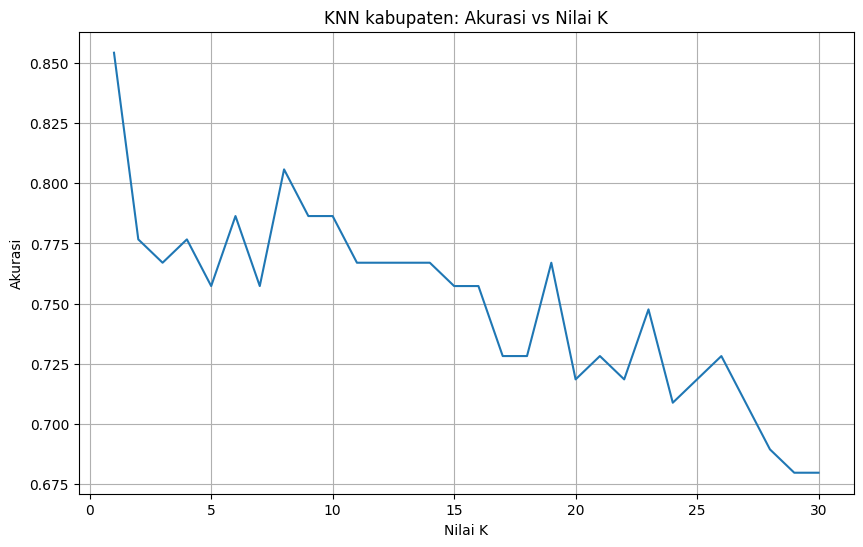


Nilai k terbaik untuk data kabupaten: 1 dengan akurasi: 0.8544

Training model kabupaten final...

Hasil Klasifikasi Data kabupaten:

Classification Report:
              precision    recall  f1-score   support

     Kelas 0       1.00      0.67      0.80         6
     Kelas 1       1.00      0.75      0.86         4
     Kelas 2       0.60      0.38      0.46         8
     Kelas 3       0.60      0.75      0.67         8
     Kelas 4       0.77      0.81      0.79        21
     Kelas 5       0.93      0.98      0.96        56

    accuracy                           0.85       103
   macro avg       0.82      0.72      0.76       103
weighted avg       0.85      0.85      0.85       103



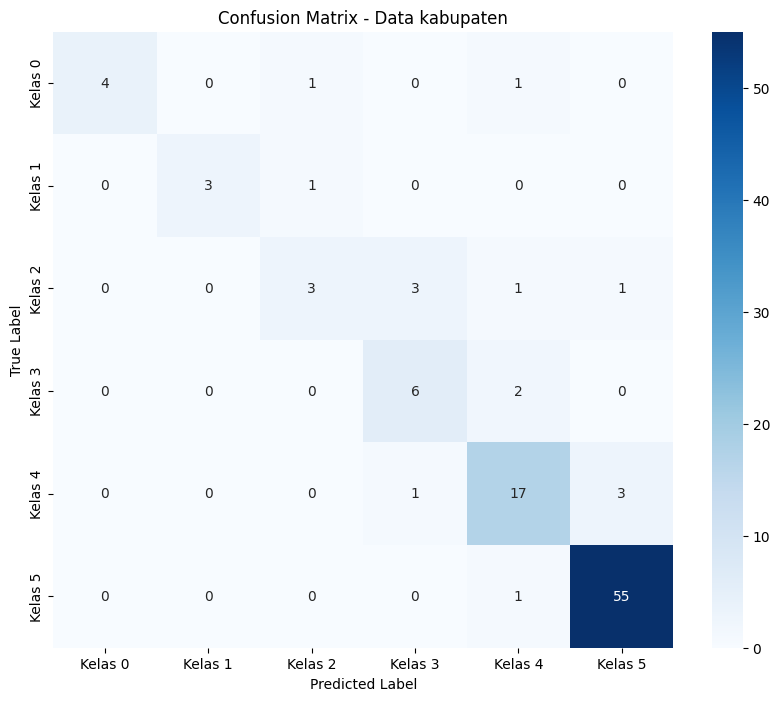

In [48]:
if __name__ == "__main__":
    main()
